# Play with data

In [1]:
# https://stackoverflow.com/questions/16249736/how-to-import-data-from-mongodb-to-pandas
import pymongo
import pandas as pd
import numpy as np
from pymongo import MongoClient


In [2]:
# https://github.com/microsoft/WSL/issues/4619
# in mongodb.cfg:   bindIp: 0.0.0.0, 127.0.0.1
client = MongoClient('mongodb://192.168.0.104:27017')
client

MongoClient(host=['192.168.0.104:27017'], document_class=dict, tz_aware=False, connect=True)

In [3]:
db = client.geometry2
db

Database(MongoClient(host=['192.168.0.104:27017'], document_class=dict, tz_aware=False, connect=True), 'geometry2')

In [4]:
db.files.count_documents({})

7751

In [5]:
objects = db.objects

In [6]:
data = pd.DataFrame(list(objects.find().limit(20000)))

In [16]:
data.describe()

,Handle,Radius,Thickness,ArcEndAngle,ArcStartAngle
count,2.000000e+04,1540.000000,1097.0,2.000000,2.000000
mean,9.509354e+05,42.079149,0.0,2.798544,3.484641
std,1.382413e+06,106.745209,0.0,1.736298,2.706585
min,0.000000e+00,1.800000,0.0,1.570796,1.570796
25%,0.000000e+00,4.800000,0.0,2.184670,2.527719
50%,4.942500e+03,12.000000,0.0,2.798544,3.484641
75%,1.503195e+06,24.000000,0.0,3.412418,4.441563
max,7.297315e+06,1233.967037,0.0,4.026292,5.398486


In [8]:
data.groupby(['ClassName']).count().sort_values(['_id'], ascending = False)

,_id,TextString,ObjectId,Color,Layer,Linetype,LineWeight,FileId,GroupId,BlockId,...,Origin,Vertices,Name,PatternName,Loops,Thickness,ControlPoints,ArcEndAngle,ArcStartAngle,Pos1
ClassName,,,,,,,,,,,,,,,,,,,,,
Line,14890,0,9239,14890,14890,14890,9239,14890,14890,0,...,0,0,0,0,0,0,0,0,0,0
Arc,1097,0,773,1097,1097,1097,773,1097,1097,0,...,0,0,0,0,0,1097,0,0,0,0
Text,978,978,862,978,978,978,862,978,978,0,...,0,0,0,0,0,0,0,0,0,0
Polyline,886,0,835,886,886,886,835,886,886,0,...,0,886,0,0,0,0,0,0,0,0
AlignedDimension,766,0,766,766,766,766,766,766,766,0,...,0,0,0,0,0,0,0,0,0,0
Circle,442,0,442,442,442,442,442,442,442,0,...,0,0,0,0,0,0,0,0,0,0
Entity,338,0,338,338,338,338,338,338,338,0,...,0,0,338,0,0,0,0,0,0,0
Hatch,184,0,0,184,184,184,0,184,184,0,...,0,0,0,184,184,0,0,0,0,0
McNotePosition,129,0,129,129,129,129,129,129,129,0,...,129,0,0,0,0,0,0,0,0,0


In [9]:
data.groupby(['ClassName']).count().sort_values(['_id'], ascending = False)

,_id,TextString,ObjectId,Color,Layer,Linetype,LineWeight,FileId,GroupId,BlockId,...,Origin,Vertices,Name,PatternName,Loops,Thickness,ControlPoints,ArcEndAngle,ArcStartAngle,Pos1
ClassName,,,,,,,,,,,,,,,,,,,,,
Line,14890,0,9239,14890,14890,14890,9239,14890,14890,0,...,0,0,0,0,0,0,0,0,0,0
Arc,1097,0,773,1097,1097,1097,773,1097,1097,0,...,0,0,0,0,0,1097,0,0,0,0
Text,978,978,862,978,978,978,862,978,978,0,...,0,0,0,0,0,0,0,0,0,0
Polyline,886,0,835,886,886,886,835,886,886,0,...,0,886,0,0,0,0,0,0,0,0
AlignedDimension,766,0,766,766,766,766,766,766,766,0,...,0,0,0,0,0,0,0,0,0,0
Circle,442,0,442,442,442,442,442,442,442,0,...,0,0,0,0,0,0,0,0,0,0
Entity,338,0,338,338,338,338,338,338,338,0,...,0,0,338,0,0,0,0,0,0,0
Hatch,184,0,0,184,184,184,0,184,184,0,...,0,0,0,184,184,0,0,0,0,0
McNotePosition,129,0,129,129,129,129,129,129,129,0,...,129,0,0,0,0,0,0,0,0,0


# Visualize drawings

In [10]:
# links
# https://arxiv.org/pdf/1704.03477.pdf
# https://arxiv.org/pdf/1904.02632.pdf

In [11]:
# https://stackoverflow.com/questions/16249736/how-to-import-data-from-mongodb-to-pandas
from IPython.display import Image

# !pip install drawsvg
# Works on linux only!
# sudo apt-get install libcairo2
import drawSvg as draw

In [12]:
file_ids = objects.find().distinct('GroupId')
len(file_ids)

500

id: 00a8a649-9fd0-4295-be49-d9ddbe26cdc6 entities: 314


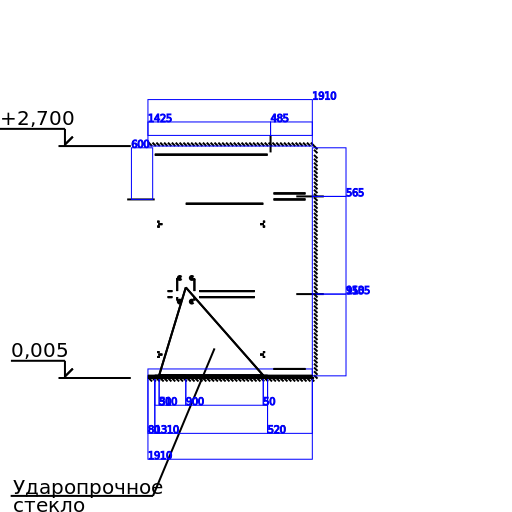

id: 01e96147-b009-4f74-b579-2f0a468ff182 entities: 739


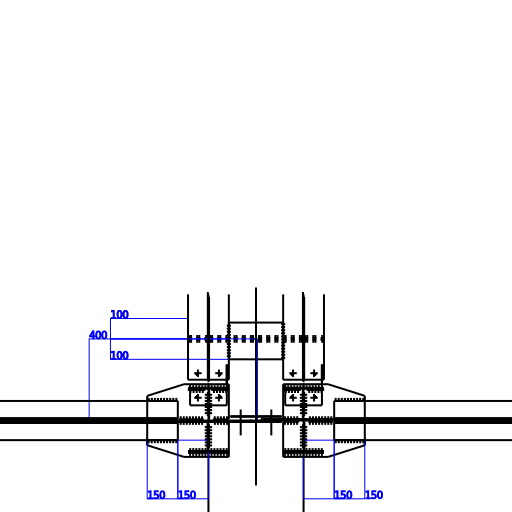

id: 02d25763-84e3-48dc-9c2f-25af7eddf197 entities: 95


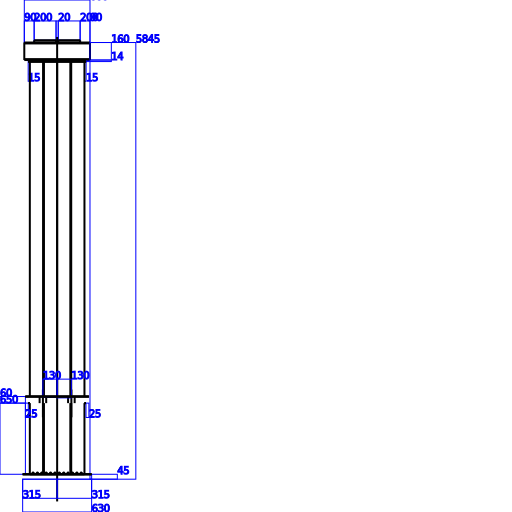

In [15]:
from processing import query_collection_to_dataframe
from plot_graphics import generate_file

for f_id in file_ids[:3]:
    # f_id = '1317d221-8d9e-4e2e-b290-3be2a0aa67fb'
    debug_data = query_collection_to_dataframe(objects, f_id)    
    
    d, _ = generate_file(debug_data,save_file=False, draw_dimensions=True, draw_texts=True, main_stroke='2')
    display(d)